In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data_set = pd.read_csv("./datasets/Customer_Purchase_Pattern_pred.csv")
data_set.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data_set.shape

(200, 5)

In [4]:
data_set['Spending Score (1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18],
      dtype=int64)

In [5]:
Genre= data_set['Genre']

genre = []
for i in range(len(data_set['Genre'])):
    if Genre[i] == 'Male':
        genre.append(0)
    else:
        genre.append(1)


In [6]:
genre = pd.DataFrame(genre,columns=['Genre'])
genre.head()

,Genre
0,0
1,0
2,1
3,1
4,1


In [7]:
features = pd.concat([data_set.loc[:,"Age":"Annual Income (k$)"],genre],axis=1)
features.head()

,Age,Annual Income (k$),Genre
0,19,15,0
1,21,15,0
2,20,16,1
3,23,16,1
4,31,17,1


In [8]:
target = data_set['Spending Score (1-100)']
target = pd.DataFrame(target,columns=['Spending Score (1-100)'])
target.head()

,Spending Score (1-100)
0,39
1,81
2,6
3,77
4,40


In [9]:
data = pd.concat([features,target],axis=1)
data.head()

,Age,Annual Income (k$),Genre,Spending Score (1-100)
0,19,15,0,39
1,21,15,0,81
2,20,16,1,6
3,23,16,1,77
4,31,17,1,40


In [10]:
correlation = data.corr('pearson')
correlation['Spending Score (1-100)'].sort_values()

Age                      -0.327227
Annual Income (k$)        0.009903
Genre                     0.058109
Spending Score (1-100)    1.000000
Name: Spending Score (1-100), dtype: float64

In [18]:
x1 = np.array(data['Spending Score (1-100)'])
x2 = np.array(data['Annual Income (k$)'])
x = np.column_stack((x1,x2))

In [19]:
sc = StandardScaler()
X = sc.fit_transform(x)

C:\Users\Shilpa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


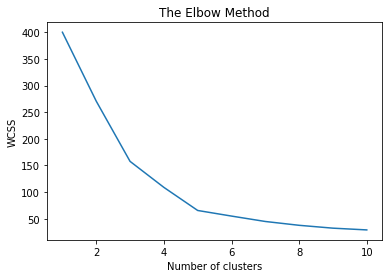

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

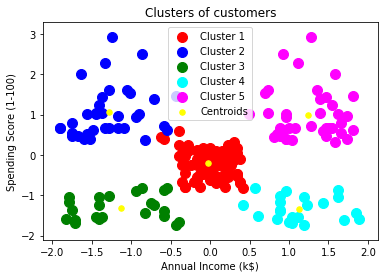

In [22]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()